In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def infec(N, V, M, eta, r_in, inhib, T_LI, T_LO):
    #Arrays counting progress towards LI and LO
    active = np.zeros(N, dtype = bool)
    dead = np.zeros(N, dtype = bool)
    LI = np.zeros(N)
    LO = np.zeros(N)

    #Initial conditions
    time = 0
    N_LI = 0
    N_LO = 0

    #Infection rates
    r_out = eta * M/V

    N = np.count_nonzero(~dead)
    A = np.count_nonzero(active)
    while np.any(~dead):
        #Draw random numbers and collect transition time
        W = r_in * A + r_out * N
        x1, x2 = [np.random.uniform(0,1), np.random.uniform(0,1)]
        tau = -1/W * np.log(x1)

        if N * r_out >= x2 * W: #LO progress
            indices = np.where(~dead)[0]
            Bac = np.random.choice(indices)
            active[Bac] = True
            LO[Bac] += 1
            LI[Bac] = max(0, LI[Bac] - inhib)
            M -= 1

            if LO[Bac] >= T_LO: #LO occurs
                active[Bac] = False
                dead[Bac] = True
                M += 100
                N -= 1
                N_LO += 1
            
            r_out = eta * M/V
        
        else: #LI progress
            indices = np.where(active & ~dead)[0]
            Bac = np.random.choice(indices)

            LI[Bac] += 1

            if LI[Bac] >= T_LI: #LI occurs
                active[Bac] = False
                dead[Bac] = True
                M += 100
                N -= 1
                r_out = eta * M/V
                N_LI += 1

        N = np.count_nonzero(~dead)
        A = np.count_nonzero(active)

        time += tau
    return N_LI, N_LO

In [43]:
N = 10**4
V = 0.01
eta = 2*10**(-9)
r_in = 0.01
T_LI = 27*r_in
T_LO = 100
inhib = r_in * 5


P = []
R = []
x = np.linspace(10**6, 10**8, 20)
for i in x:
    M = i
    N_LI, N_LO = infec(N, V, M, eta, r_in, inhib, T_LI, T_LO)
    R.append(N_LO/(N_LO + N_LI))

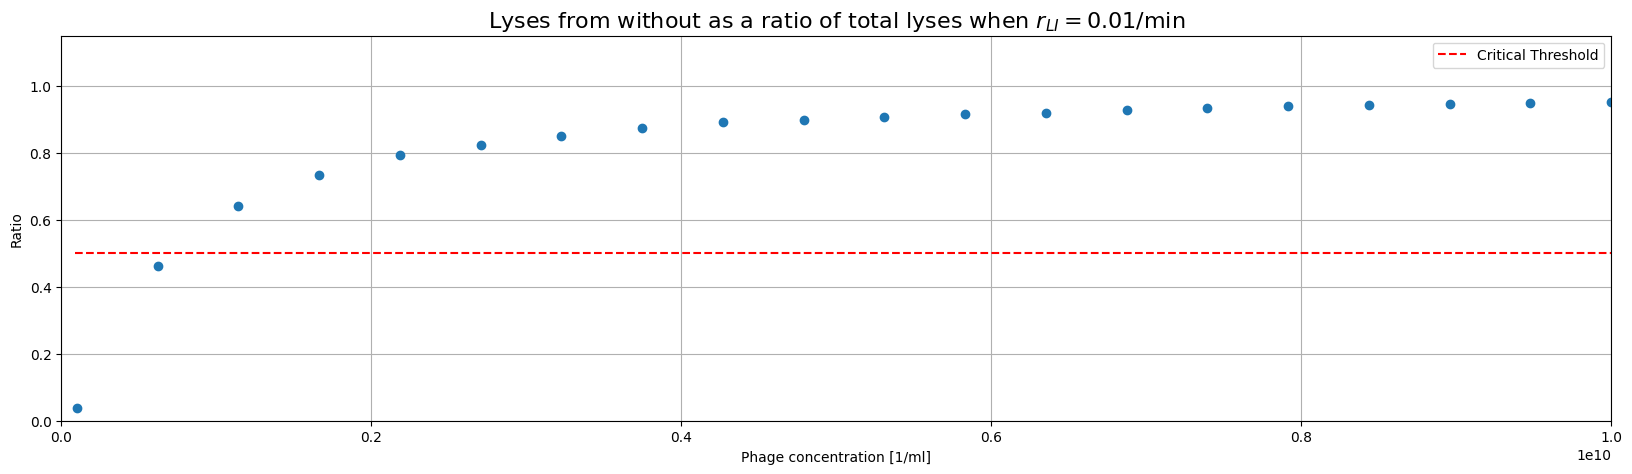

In [44]:
x = x/V
plt.figure(figsize = (20,5))
plt.title('Lyses from without as a ratio of total lyses when $r_{LI} = 0.01 /$min', size = 16)
plt.xlabel('Phage concentration [1/ml]')
plt.ylabel('Ratio')
plt.ylim(0, 1.15)
plt.xlim(0, max(x) + 0.1 * 10**7)
plt.hlines(0.5, min(x) - 10**7, max(x) + 10**7, color = 'red', linestyle = 'dashed', label = 'Critical Threshold')
plt.grid()
plt.plot(x, R, 'o')
plt.legend()

In [ ]:
N_LI, N_LO = infec(N = 500, V = 0.01, M = b, eta = 2*10**(-9), r_in = 0.01, inhib = 5*0.01, T_LI = 0.01, T_LO = 100)

In [39]:
y = np.linspace(10**6, 4*10**6, 30)
x = np.linspace(0.1, 0.5, 10)

X, Y = np.meshgrid(x, y)

Ratio = np.zeros_like(X)

for i, a in enumerate(x):
    T_in = 27 * a
    mu = 5 * a
    for j, b in enumerate(y):
        N_LI, N_LO = infec(N = 500, V = 0.01, M = b, eta = 2*10**(-9), r_in = a, inhib = mu, T_LI = T_in, T_LO = 100)
        Ratio[j, i] = N_LO / 500

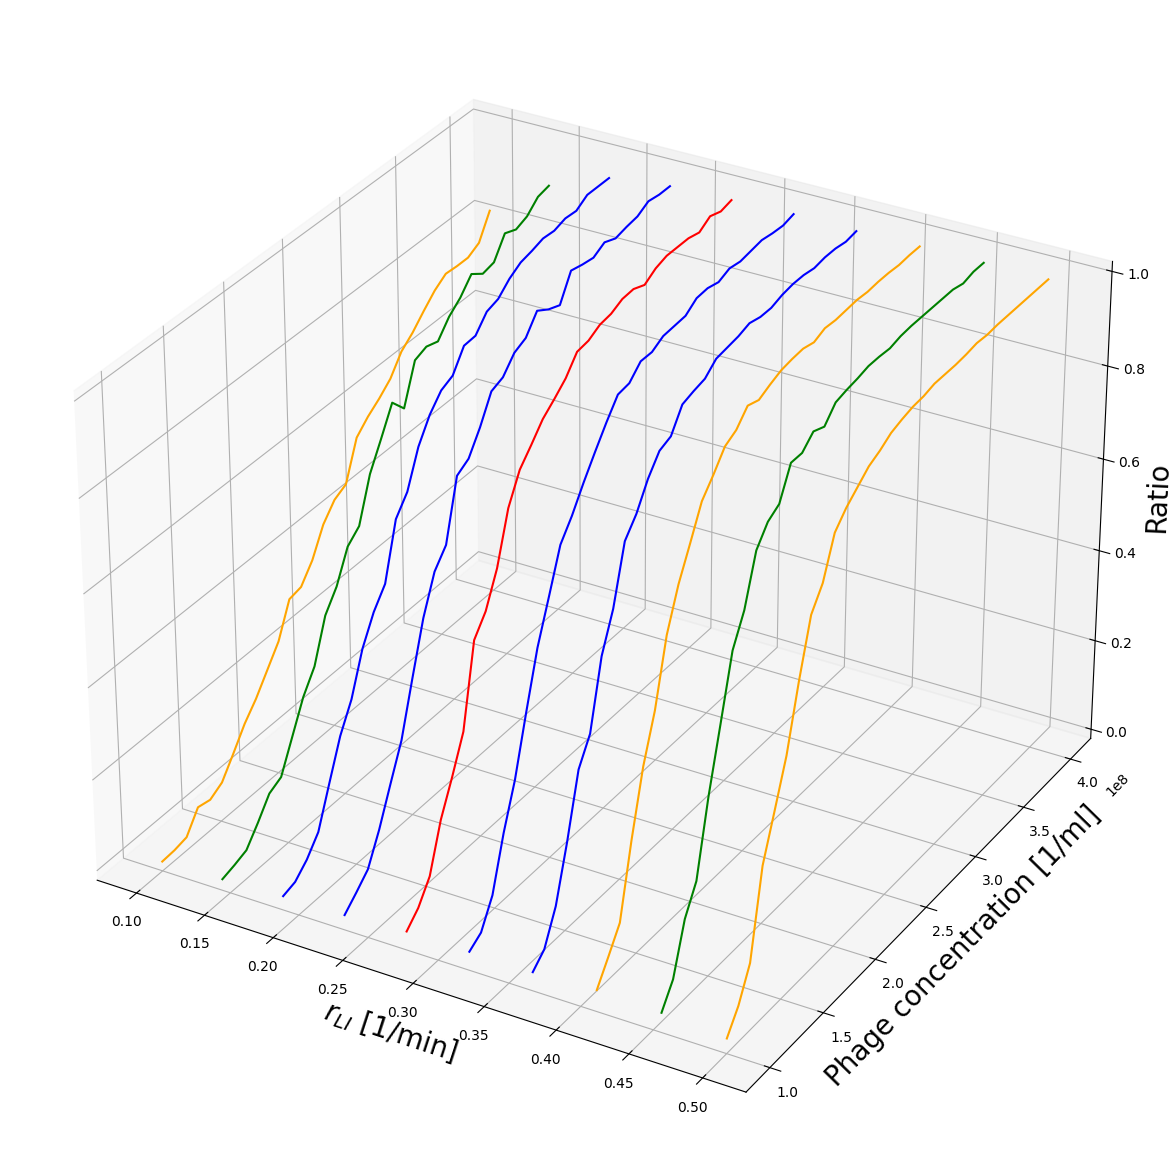

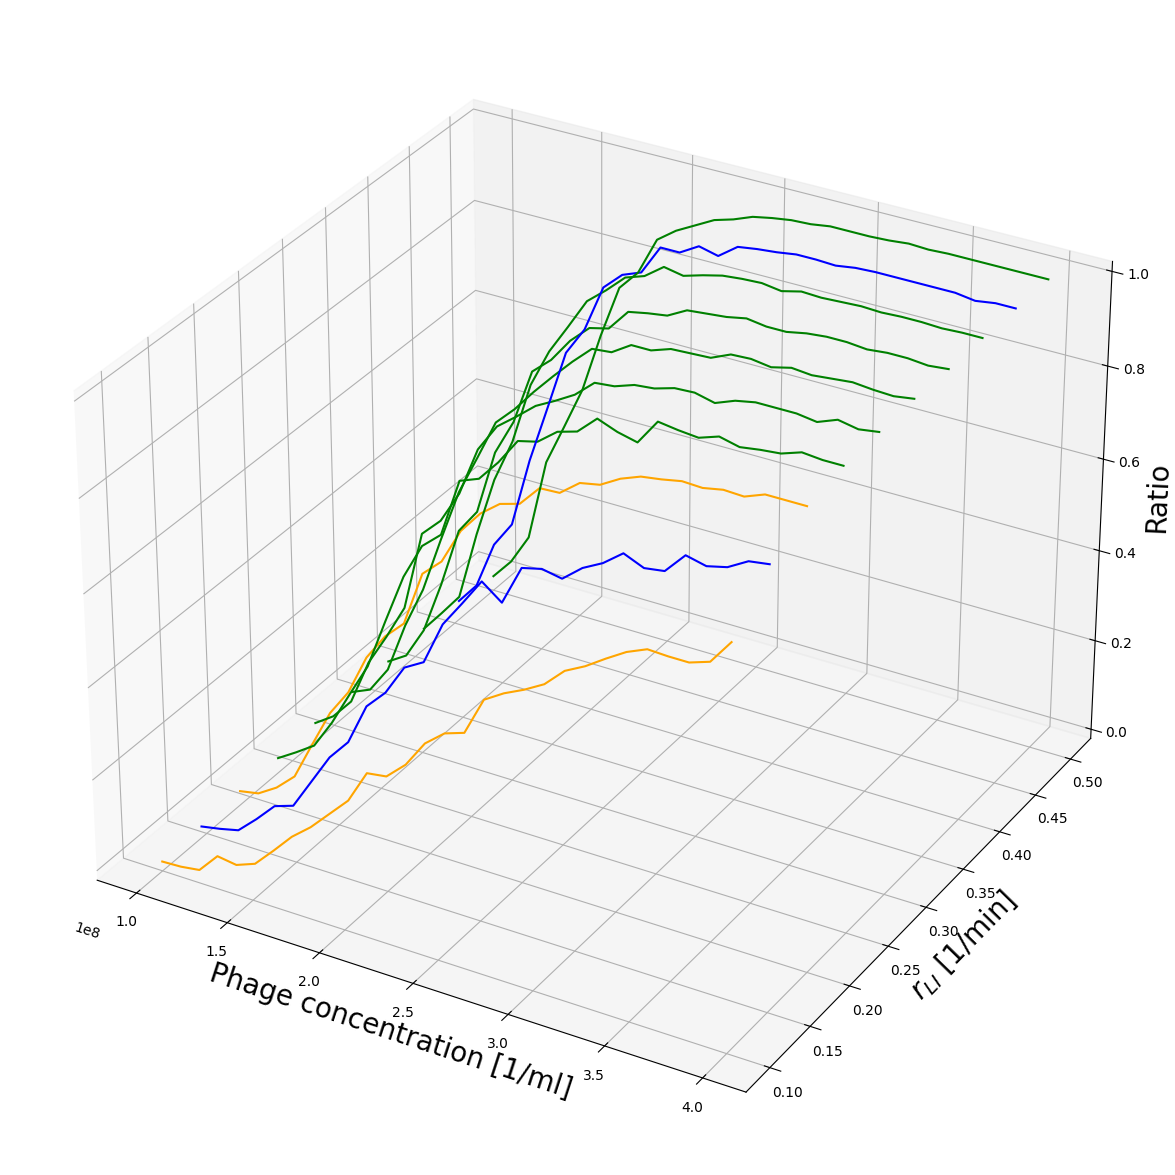

In [40]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue', 'orange', 'purple']

# Plot the surface
for j in range(X.shape[1]):
    ax.plot(X[:, j], Y[:, j] / 0.01, Ratio[:, j], color = colors[np.random.randint(0,len(colors) - 1)])


ax.set_xlabel('$r_{LI}$ [1/min]', size = 20)
ax.set_ylabel('Phage concentration [1/ml]', size = 20)
ax.set_zlabel('Ratio', size = 20)

plt.show()

fig2 = plt.figure(figsize = (15,15))
ax2 = fig2.add_subplot(111, projection='3d')

ax2.set_xlabel('Phage concentration [1/ml]', size = 20)
ax2.set_ylabel('$r_{LI}$ [1/min]', size = 20)
ax2.set_zlabel('Ratio', size = 20)

for j in range(X.shape[1]):
    ax2.plot(Y[:, j] / 0.01, X[:, j], Ratio[:, j], color = colors[np.random.randint(0,len(colors) - 1)])


plt.show()